# Pittsburgh's Best Neighborhood

**By Cole, Sean, and Jordan**

---
## Introduction

Our goal, like everyone else, was to find the best neighborhood in Pittsburgh. Before we combed through all the possible datasets, we talked about things that would make us like a neighborhood. After a bit of discussion and tightening our scope, we decided we wanted to foucus on a neighborhood's greenery. There are a lot of data sets we looked at, but the sets we were looking at were missing important data that we needed to combine it with other data. For example, we decided to not use a dataset of Allegheny County Particulate Matter 2.5. This was due to its lack of an easy neighborhood data point to combine with our other data.

---
## The Metric

Greenery is partially vauge, so let's break it down. Greenery, to us, meant trees, parks, and air qualtiy. Using this as our base, we went out to find datasets that would accurately fit those niches. After a bit of searching and swapping datasets, we found our datasets. We settled on two datasets of parks in Pittsburgh, a dataset of trees in Pittsburgh, and a dataset of traffic analysis in Pittsburgh. Below, we will import the needed libraries and datasets we use later.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data
traffic = pd.read_csv("Traffic.csv", index_col="id")
park1 = pd.read_csv("Park1.csv", index_col="id")
park2 = pd.read_csv("Park2.csv", index_col="objectid")
trees = pd.read_csv("Treedata.csv", index_col="id")

---
## The Best Neighborhood


### Parks
Jordan's datasets both involve parks around Pittsburgh. The first dataset on parks had two key data points that we want, the name of the park and the neighborhood in which that park resided. The orginal idea was that if a neighborhood had more parks, the greener the neighborhood. Jordan represented this dataset with horizontal bar graph.

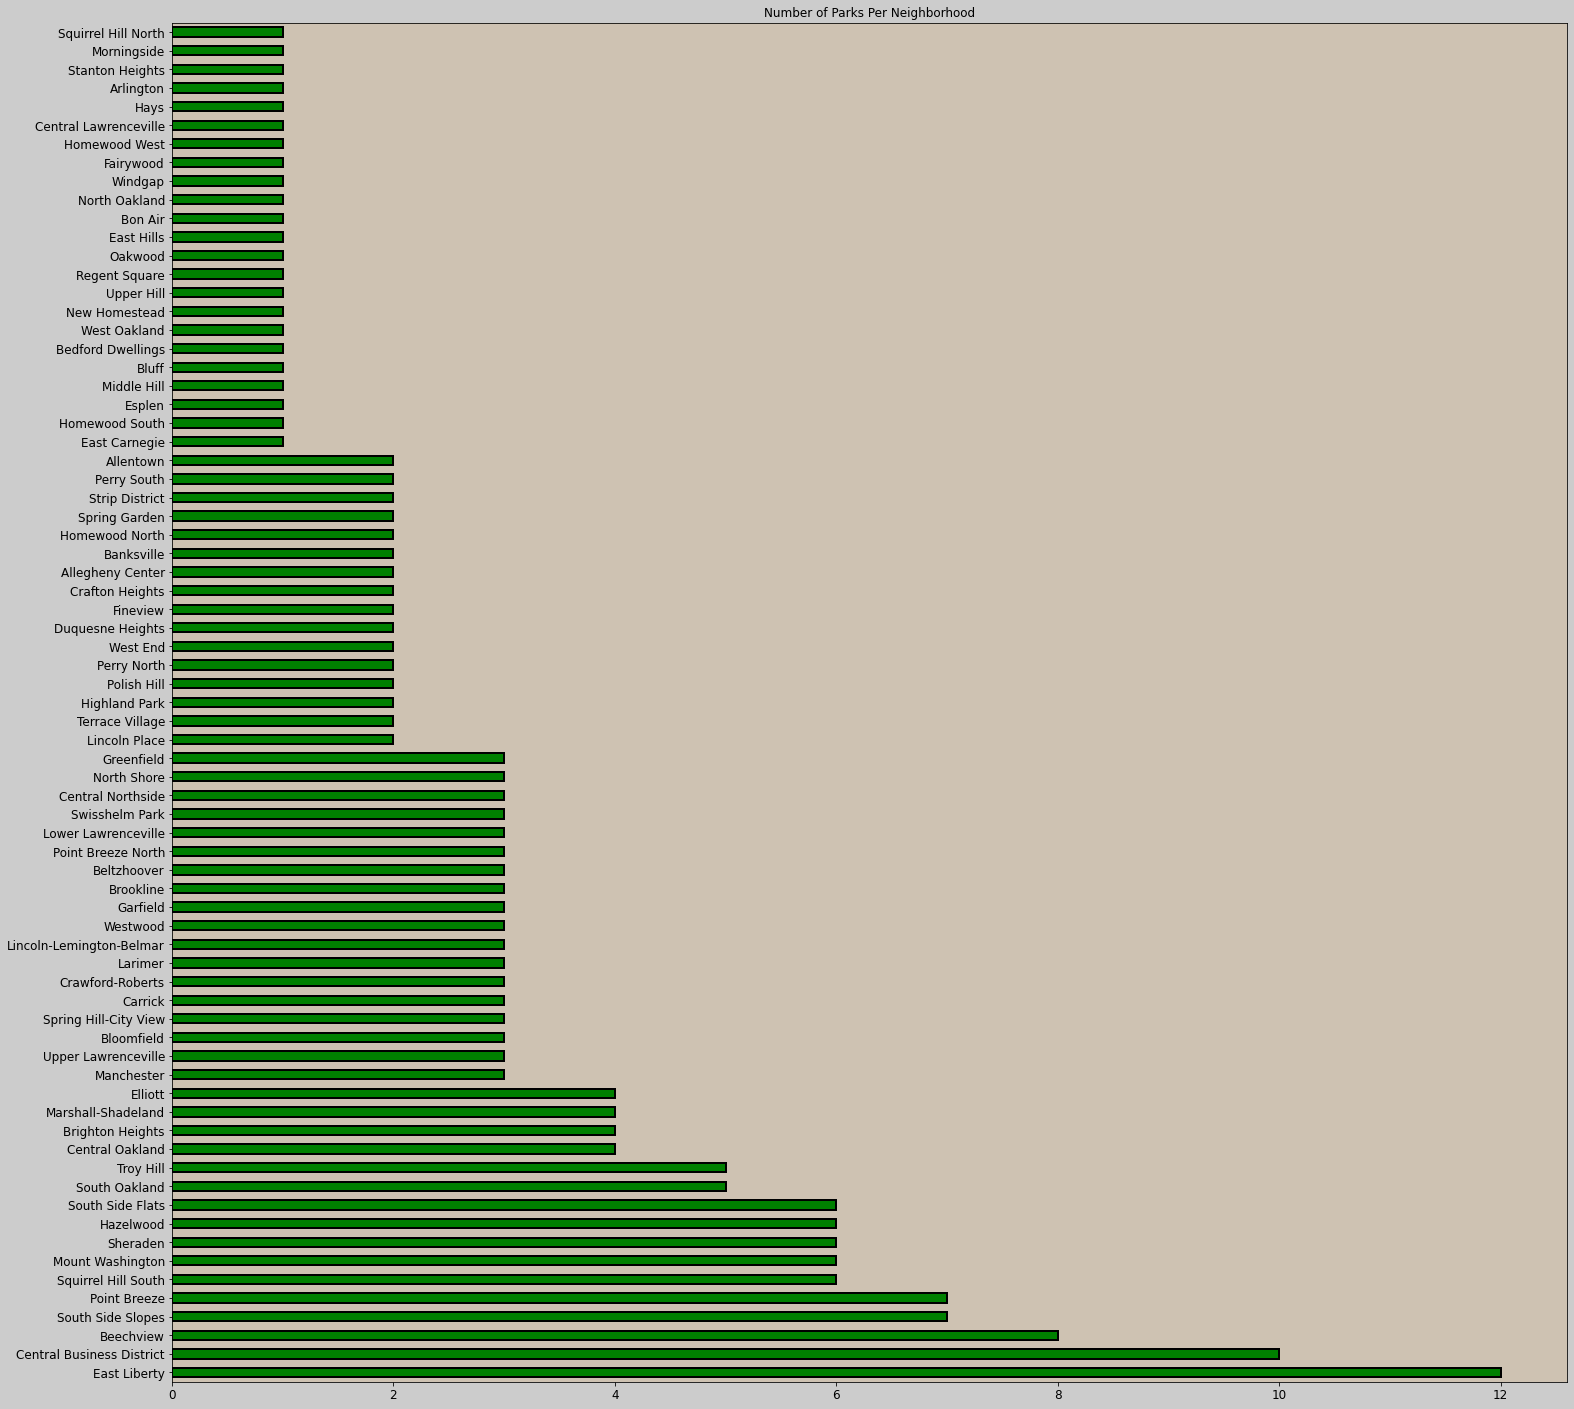

In [10]:
fig = plt.figure()
fig.patch.set_facecolor('black')
fig.patch.set_alpha(0.2)
npn = park1['neighborhood'].value_counts().plot(kind='barh', figsize=(25,25), title='Number of Parks Per Neighborhood', fontsize=12, color='g', edgecolor='black', linewidth=2)
npn.set(facecolor = 'tan')
npn.patch.set_alpha(0.4)

After plotting this out, Jordan realized that just because a neighborhood had multiple parks donesn't necessarily mean that there is alot of greenspace. This lead Jordan to seek out this second dataset of parks. This dataset had all the parks in Pittsburgh and the acreage of each park. There is a problem however. This dataset doesn't have the neighborhood in which the park resides as a data point. This means we have to use some pandas trickery to merge the first and second datasets together to better use this data. After merging these datasets, Jordan represents the total acreage of all parks in each neighborhood in a horizontal bar graph below.

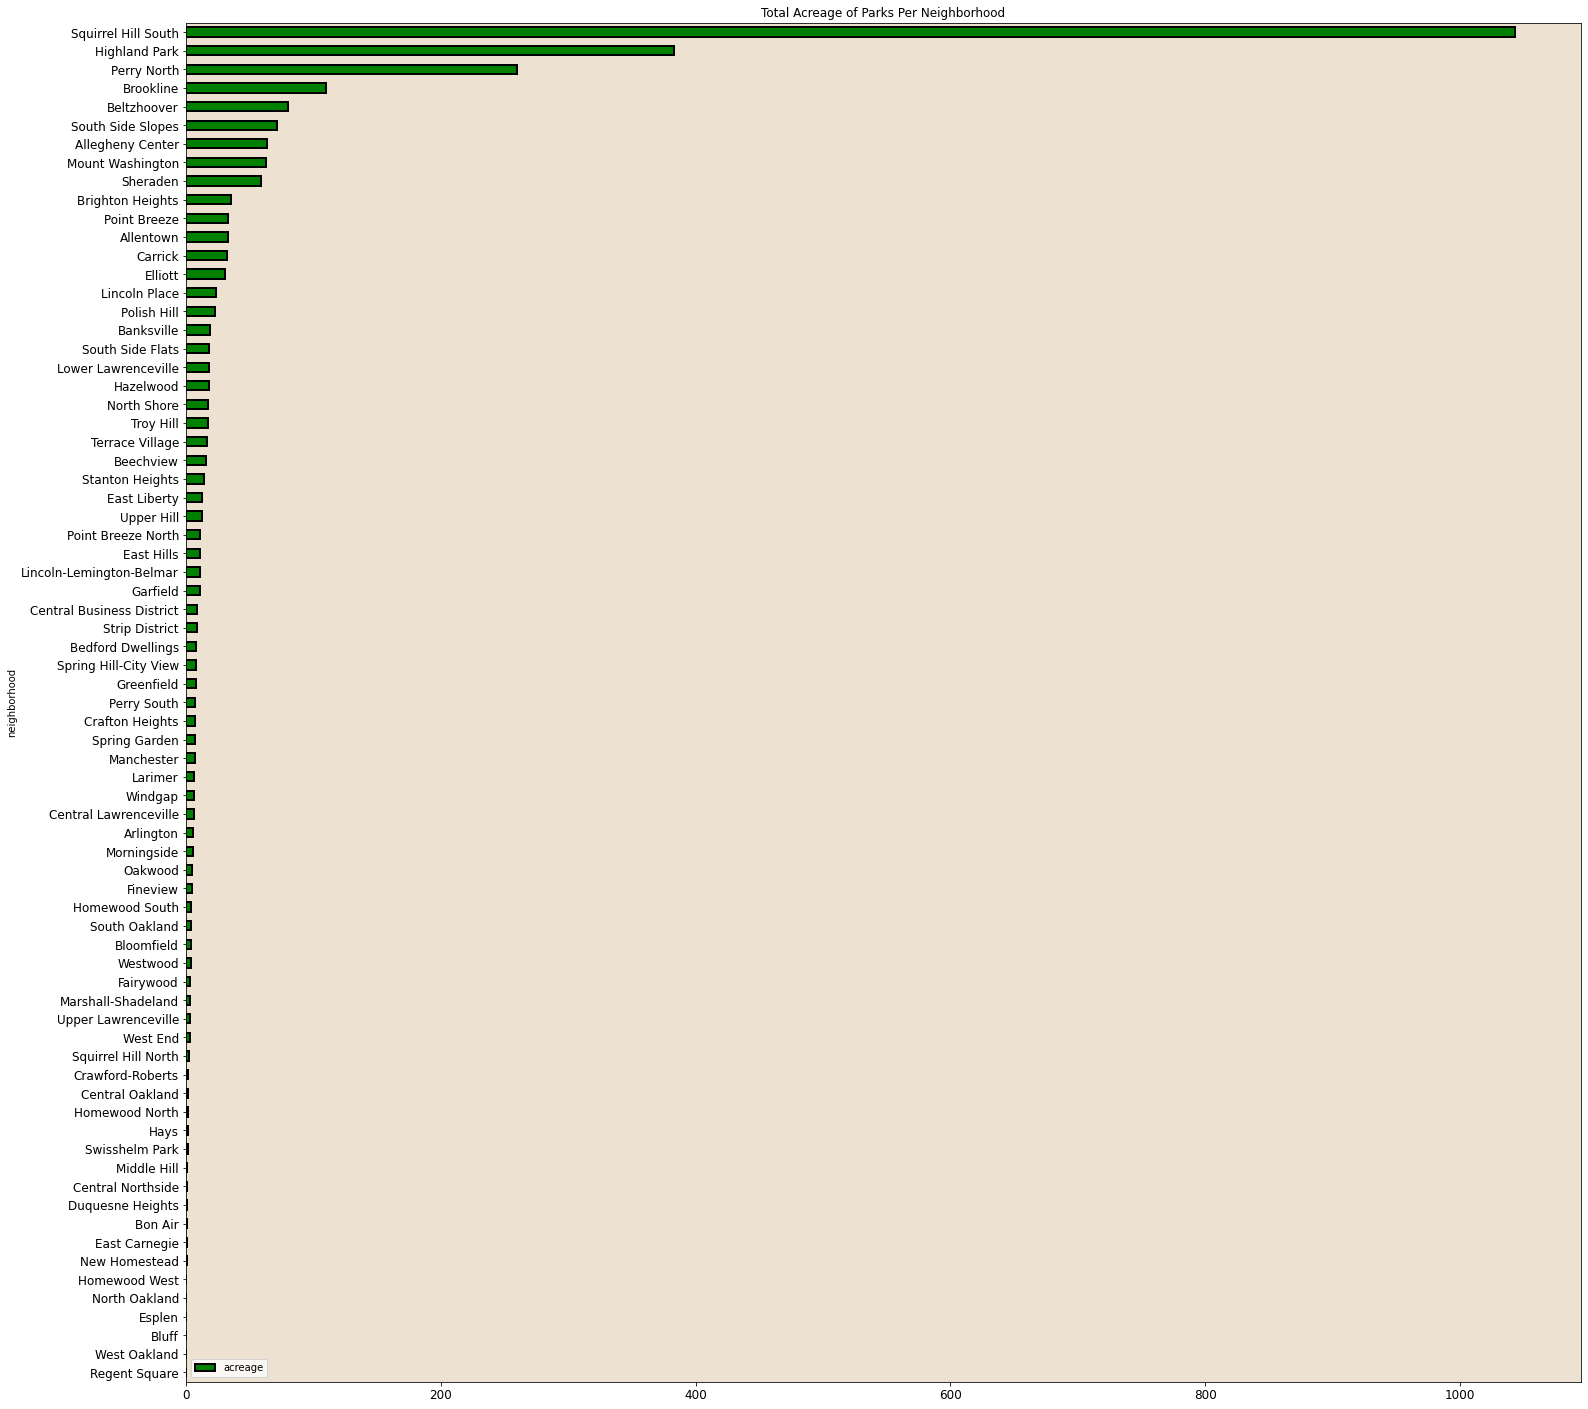

In [30]:
park = pd.merge(left=park1, right=park2, left_on='name', right_on='updatepknm')
park = park.filter(['neighborhood', 'name', 'acreage'])
parktotal = park.groupby('neighborhood').sum()
npn = parktotal.sort_values('acreage').plot(kind='barh', figsize=(25,25), title='Total Acreage of Parks Per Neighborhood', fontsize=12, color='g', edgecolor='black', linewidth=2)
npn.set(facecolor = 'tan')
npn.patch.set_alpha(0.4)

### Trees

Sean was orginally planning to focus on air quality per neighborhood, but there was not a dataset that had all the data points we were looking for. Sean decided to pivot to trees instead. This dataset is made up indivduals entries for each tree in the Pittsburgh area. To help you get an idea of how many trees are recorded, below is a bar graph that breaks down the trees by their current condition.

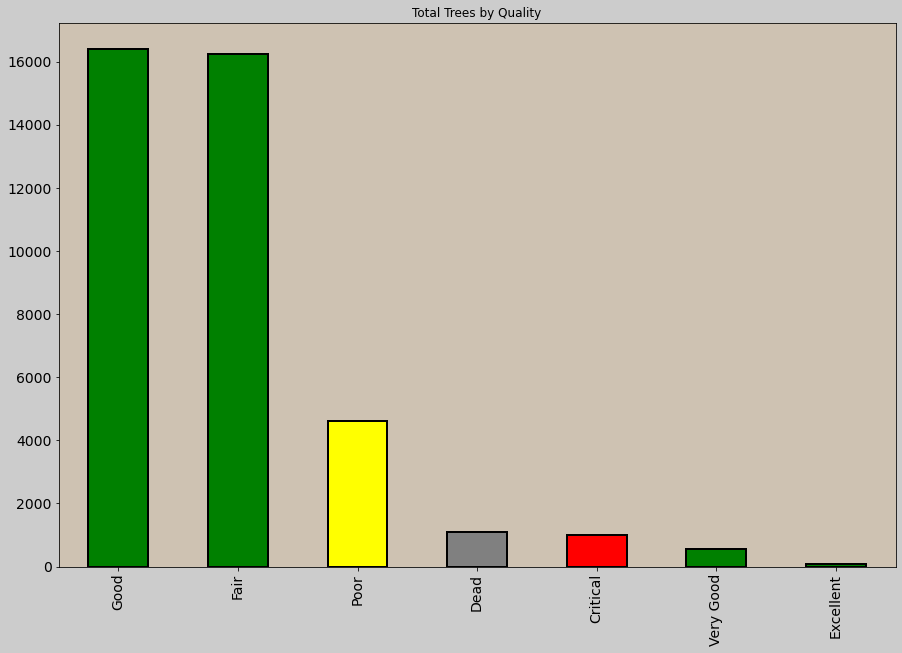

In [28]:
fig = plt.figure()
fig.patch.set_facecolor('black')
fig.patch.set_alpha(0.2)
tqa = trees['condition'].value_counts().plot(kind='bar',figsize=(15,10),title='Total Trees by Quality',fontsize=14,color=['green','green','yellow','gray','red','green','green'],edgecolor='black',linewidth=2)
tqa.set(facecolor = 'tan')
tqa.patch.set_alpha(0.4)

The real useful information in this dataset was each tree's neighborhood data point. By utilizing pandas filter and value_counts functions, Sean was able to get the total number of trees per neighborhood. We are working on the assumption that the more trees in a neighborhood, the more green it is. Below is a bar graph that shows this data.

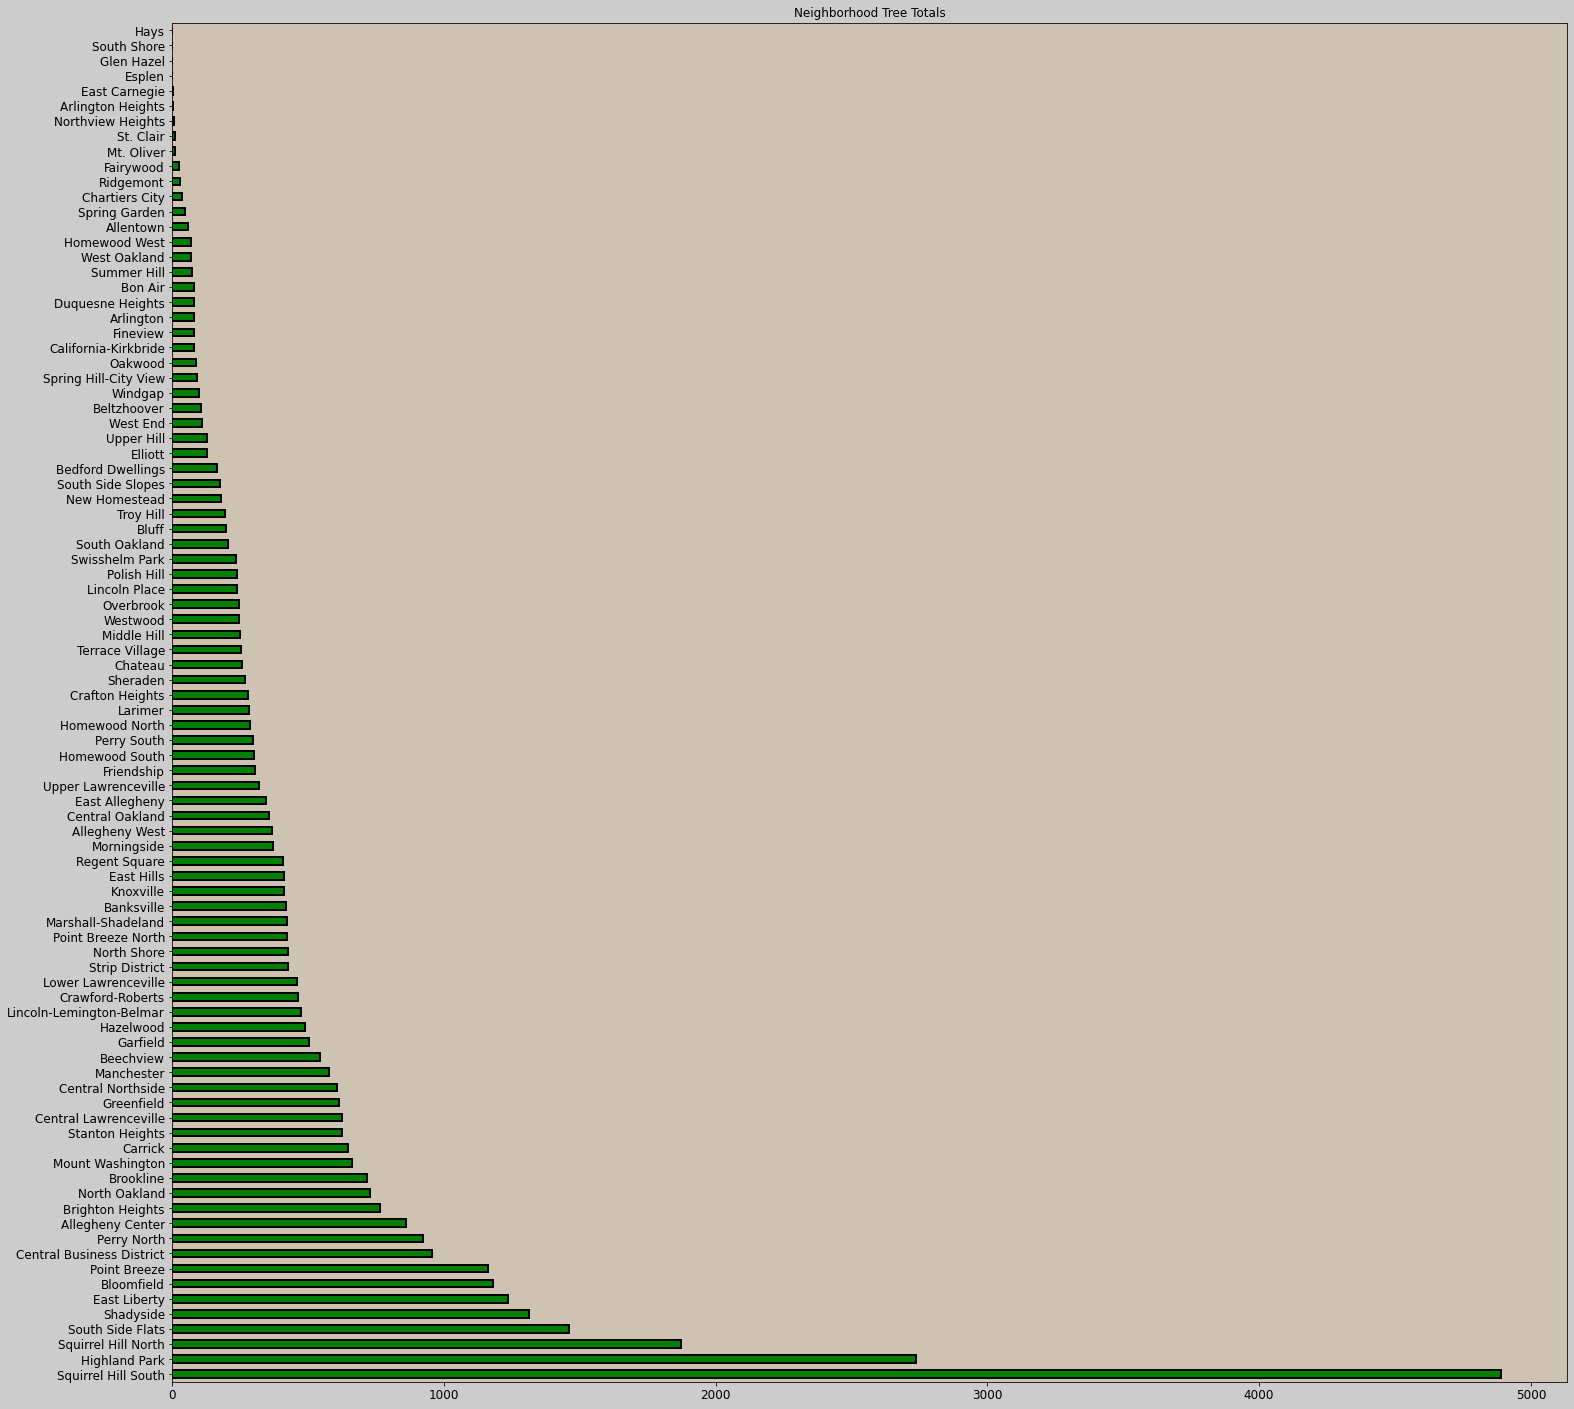

In [29]:
treefiltered = trees[trees['common_name'] != 'Stump']
treefiltered = trees.filter(['neighborhood', 'condition', 'air_quality_benfits_total_dollar_value'])
treefiltered = treefiltered[treefiltered['neighborhood'].notnull()]
treefiltered = treefiltered[treefiltered['condition'].notnull()]

fig = plt.figure()
fig.patch.set_facecolor('black')
fig.patch.set_alpha(0.2)
nta = treefiltered['neighborhood'].value_counts().plot(kind='barh', figsize=(25,25), title='Neighborhood Tree Totals', fontsize=12,color='g', edgecolor='black', linewidth=2)
nta.set(facecolor = 'tan')
nta.patch.set_alpha(0.4)

### Traffic

Cole had also tossed around the idea of doing air pollution, but there were no datasets that would mesh well with the rest of our data. He settled on using a Pittsburgh traffic analyses dataset because of two major data points, the nieghborhood in which the analysis was taken and the average daily car traffic. The reason average daily car traffic in a nieghborhood is important is due to carbon dioxide. The average passenger car outputs 4.6 metric tons of carbon dioxide per year. Since carbon dioxide is detrimental to human's and nature's health, the more traffic the worse the nieghborhood for this metric. Below is a hoizontal bar graph that shows the average daily car traffic per nieghborhood.

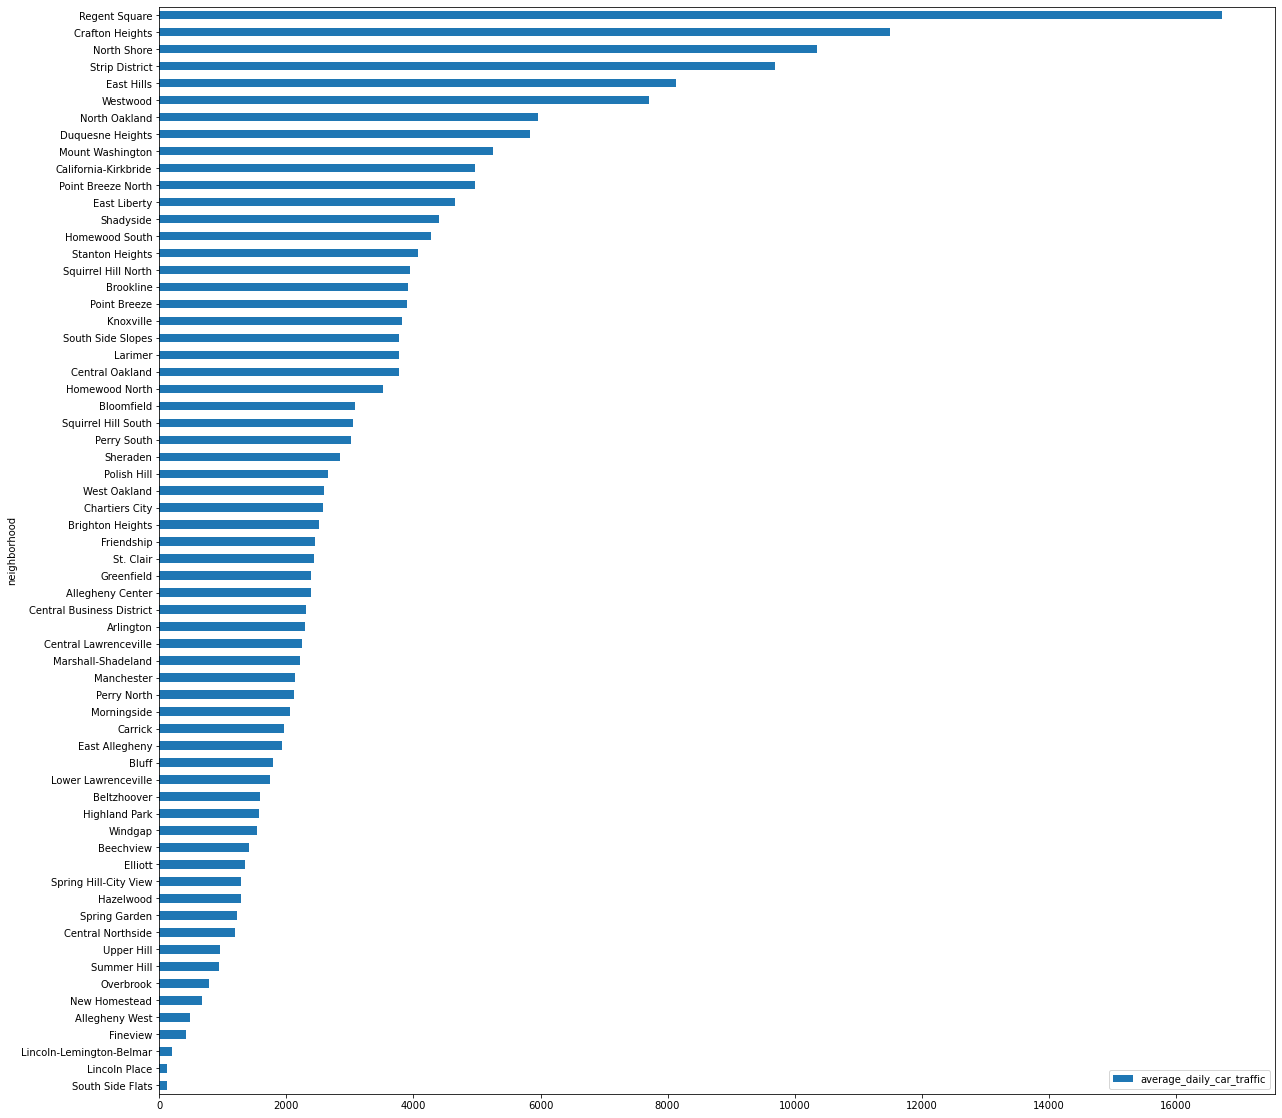

In [55]:
traffic_no_empty = traffic[traffic['average_daily_car_traffic'].notnull()]
traffic_no_empty = traffic_no_empty[traffic_no_empty['neighborhood'].notnull()]
traffic_filtered = traffic_no_empty.filter(['neighborhood', 'average_daily_car_traffic'])
traffic_filtered.groupby('neighborhood').mean().sort_values('average_daily_car_traffic').plot.barh(figsize=(20,20));

---
### Top 5 Neighborhoods Per Metric

The top 5 Neighborhoods based on Total Park Acreage are:
1. Squirrel Hill South
2. Highland Park
3. Perry North
4. Brookline
5. South Side Slopes

The top 5 Neighborhoods based on Neighborhood Tree Amounts:
1. Squirrel Hill South
2. Highland Park
3. Squirrel Hill North
4. South Side Flats
5. Shadyside

The top 5 Neighborhoods based on Average Daily Car Traffic per Neighborhood:
1. South Side Flats
2. Lincolin Place
3. Lincoln-Lenington-Belmar
4. Fineview
5. Allegheny West

Based on the data found between these four datasets, we have concluded the Squirrel Hill South is the best neighborhood.

## Conclusion

We were not suprised to find that Squirrel Hill South was in the top 5 for multiple categories, but we were suprised that it would go to take the title of Best Neighborhood. Cole's favorite neighborhood was Shadyside. It was able to hit the top 5 in Neighborhood Tree Amounts but had very little park land and was fairly high in traffic. Jordan's favorite neighborhood was South Oakland, but it was not well represented within the datasets we utilized due to its lack of parks and low amount of trees. Sean's favorite neighborhood is Squirrel hill because of all the time he spent there throughout his life. Squirrel hill has beautiful housing, plenty of shops, and parks that contribute to the overall quality of the neighborhood. It seems that our metric is a good indicater for Sean.